# Introduction to `lamatrix`: Multi-dimensional models

`lamatrix` provides you with ways to build linear models for any shape input data or vectors. This means you can fit high dimensional data with high dimensional inputs. Let's take a look at fitting some simple 2D data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Below we create some fake data to fit. Here we've created a simple 2D, 1st order polynomial in two dimensions, x and y. We've then included some noise.

In [2]:
x = np.arange(-5, 5, 0.02)
y = np.arange(-1, 1, 0.005)
X, Y = np.meshgrid(x, y)

w = [1.3598, 0.4589, 2.495, -0.0234]
Z = w[0] + w[1] * X + w[2] * Y + w[3] * X * Y + np.random.normal(0, 1.2, size=X.shape)
Ze = np.ones_like(Z) * 1.2

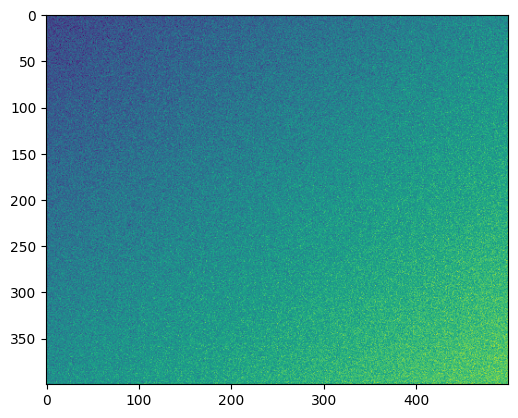

In [3]:
plt.imshow(Z)

Let's try to fit a polynomial to this data so that we can retrieve the best fit weights. Firstly, we will create a 1st order polynomial in each of the dimensions we are interested in.

In [4]:
from lamatrix import Polynomial, Constant

In [5]:
px = Constant() + Polynomial('x', order=1)
py = Constant() + Polynomial('y', order=1)

In [6]:
model = py * px

Let's take a look at the model

In [7]:
model

JointModel
	Constant()[n, 1]
	Polynomial(x)[n, 1]
	Polynomial(y)[n, 1]
	CrosstermModel(y, x)[n, 1]

This looks great, we've included a constant term, the polynomials for each dimension, and a `CrosstermModel` object which holds the cross terms between the X and Y polynomials. Let's look at the equation

In [8]:
model.equation

'\\[f(\\mathbf{y}, \\mathbf{x}) = w_{0}  + w_{1} \\mathbf{x}^{1} + w_{2} \\mathbf{y}^{1} + w_{3} \\mathbf{y}^{1}\\mathbf{x}^{1}\\]'

This looks like what we expect!

Note here I have included the terms in a certain order. This will impact the order of the posteriors from the fit. If you change the order of operations you will still be able to fit the data, but you should be careful to understand the order of the posterior weights.

Let's fit this to data!

In [9]:
model.fit(x=X, y=Y, data=Z, errors=Ze)

The fit runs with no errors, let's look at the best fit

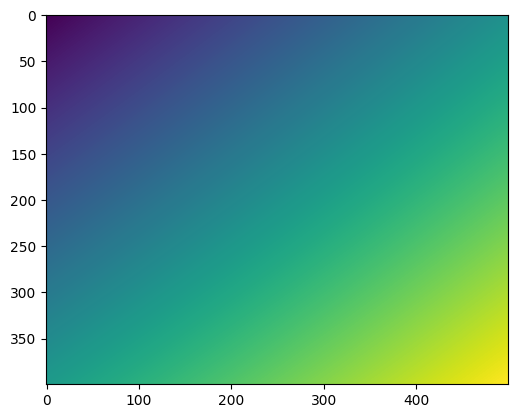

In [10]:
plt.imshow(model.evaluate(x=X, y=Y))

This is an excellent fit to our data, let's look at the posteriods

In [11]:
model.posteriors.mean

array([ 1.35891126,  0.45935322,  2.49255331, -0.02237879])

This is within errors of our input weights

In [12]:
w

[1.3598, 0.4589, 2.495, -0.0234]

Let's imagine now instead we want to include a different set of inputs. Let's assume we have a vector of x and y positions and we want to evaluate the model. We can simply evaluate at those points

In [13]:
model.evaluate(x=np.arange(-2, 2, 0.2), y=np.random.uniform(-1, 1, size=20))

array([-0.18413205,  1.17445347,  0.86230162,  2.06294291,  2.11575105,
        2.42403257, -0.73040464,  1.4441065 ,  2.71934991,  0.0445405 ,
        2.63988653, -0.01479923,  3.22968566,  3.89655736,  0.56844507,
        0.80023191,  3.58979212,  3.84629225,  1.66775325,  4.53684707])

You can combine any number of high dimensional vectors and datasets here as needed. When you fit, you must pass in data and inputs that all have the same shape.